# Análise Exploratória de Dados (EDA)
## Heart Failure Prediction

Este notebook tem como objetivo realizar uma Análise Exploratória de Dados (EDA) sobre o dataset de **Heart Failure Prediction**, buscando compreender a estrutura dos dados, identificar padrões relevantes, possíveis inconsistências e gerar insights que auxiliem nas etapas posteriores de pré-processamento e modelagem.



## Contexto do Problema

Doenças cardiovasculares estão entre as principais causas de morte no mundo. A detecção precoce de pacientes com maior risco de insuficiência cardíaca é essencial para apoiar decisões clínicas e estratégias preventivas.

Este dataset reúne informações clínicas, laboratoriais e demográficas de pacientes, com o objetivo de prever a ocorrência de **doença cardíaca** a partir dessas variáveis.


## 1. Carregamento do Dataset



Carregamento do dataset e inspeção inicial para compreender sua estrutura geral.

Nesta etapa, analisamos:
- Dimensões do dataset (número de linhas e colunas)
- Tipos das variáveis (numéricas e categóricas)
- Presença de valores ausentes
- Primeiras observações dos registros

Essa análise inicial é essencial para guiar decisões de pré-processamento e modelagem nas próximas etapas.

In [ ]:
# Importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Carregando o arquivo csv
df = pd.read_csv('../Data/heart.csv')

In [ ]:
# Verificar as dimensões do arquivo
df.shape

(918, 12)

In [ ]:
# Verificar as informações do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Verificar se há Missing Data
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# Verificar as primeiras linhas do DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


## 2. Visão Geral das Variáveis



Nesta seção, exploramos as variáveis presentes no dataset, identificando quais são numéricas e quais são categóricas.

Essa separação é importante pois:
- Variáveis numéricas e categóricas exigem tratamentos diferentes no pré-processamento
- Alguns modelos são sensíveis à escala dos dados
- A codificação correta das variáveis categóricas impacta diretamente o desempenho dos modelos

A compreensão do tipo de cada variável ajuda a estruturar um pipeline de Machine Learning mais consistente.

In [ ]:
# Total de Valores Únicos de cada variável
valores_unicos = []
for i in df.columns[0:12].tolist():
  print(i, ':', len(df[i].astype(str).value_counts()))
  valores_unicos.append(len(df[i].astype(str).value_counts()))

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


Após à apresentação dos valores contidos em cada variável. Obeservamos e analisamos a quantidade de dados presentes em cada cada uma dessas 3 variáveis:

1.   Variáveis numéricas: Age, RestingBP, Cholesterol, MaxHR, Oldpeak
2.   Variáveis categóricas: Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina e ST_Slope.
3.   Variável alvo (Heart Disease): Alvo do nosso modelo


## 3. Estatísticas Descritivas

As estatísticas descritivas fornecem uma visão quantitativa das variáveis numéricas do dataset.

A partir delas, é possível observar:
- Tendência central (média e mediana)
- Dispersão dos dados (desvio padrão)
- Valores mínimos e máximos

Essas informações ajudam a identificar possíveis outliers, distribuições assimétricas e diferenças de escala entre as variáveis.


In [ ]:
# Visualizando medidas estatísticas do DataFrame
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


## 4. Análise Univariada

Antes de avançar para análises mais detalhadas, é fundamental avaliar a distribuição da variável alvo (`HeartDisease`).

Essa análise permite identificar se o dataset apresenta desbalanceamento entre as classes, o que pode impactar:
- A escolha das métricas de avaliação
- O comportamento dos modelos durante o treinamento
- A interpretação dos resultados

Em contextos de saúde, métricas como Recall e F1-score costumam ser mais relevantes do que a acurácia simples.

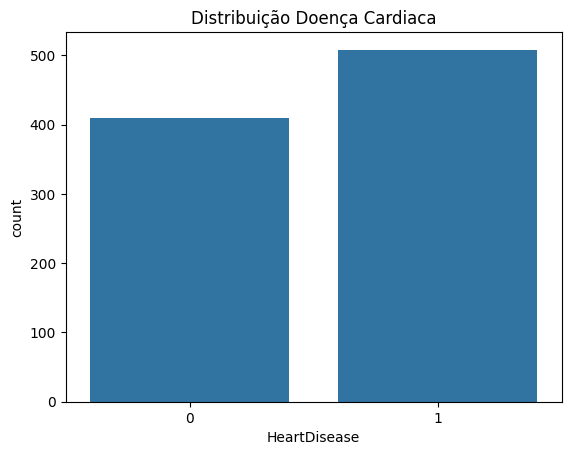

In [ ]:
# Quantidade de observações Doença Cardiaca (target)
sns.countplot(x='HeartDisease', data=df)
plt.title("Distribuição Doença Cardiaca")
plt.show()

Analisando a variável alvo da nossa função, dividida em duas classes 1 (+ para Heart Disease) e 0 (- para Heart Disease). Identifica-se uma maior quantidade dos dados para a classe positiva, logo, interpreta-se que os muitas das variavéis numéricas e categóricas influenciam para o desenvolvimento da HD. |Outro ponto que é natural de dados biológicos em sua maioria e um desbalanceamento entre os dados, que nesse caso há uma maior quantidade para classe 1.

### 4.1 Variáveis Numéricas

Nesta seção, analisamos a distribuição das variáveis numéricas utilizando histogramas e boxplots.

O objetivo é:
- Compreender o formato das distribuições
- Identificar possíveis outliers
- Comparar padrões entre pacientes com e sem doença cardíaca

Com o objetivo de identificar variáveis com maior potencial discriminativo.

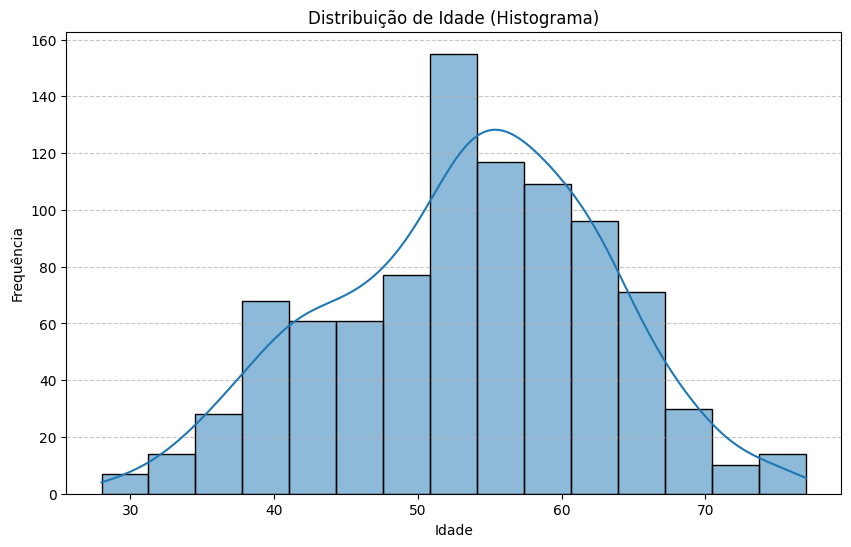

In [ ]:
# Visualizando através do Histograma a distribuição de Idade
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Distribuição de Idade (Histograma)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nessa análise vemos o histograma da idade das pessoas e suas frequências cardíadas. Vemos que ocorre um desvio para a direita do gráfico.

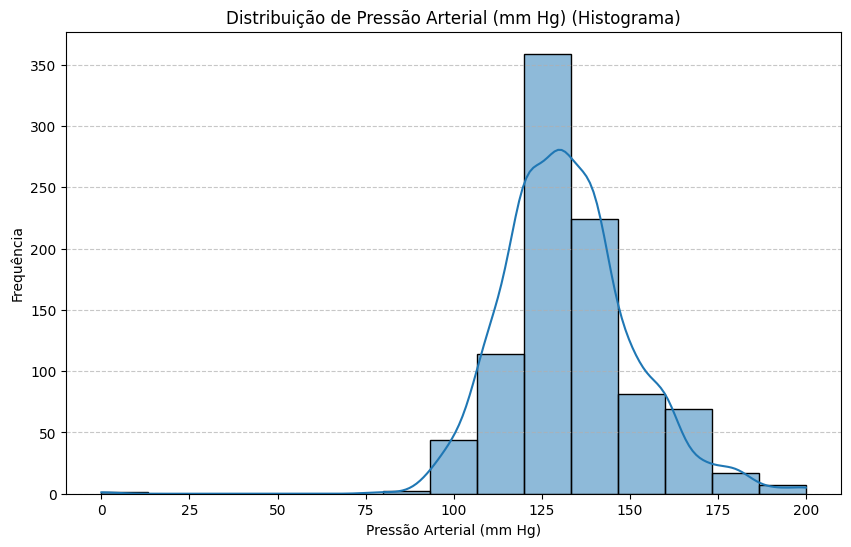

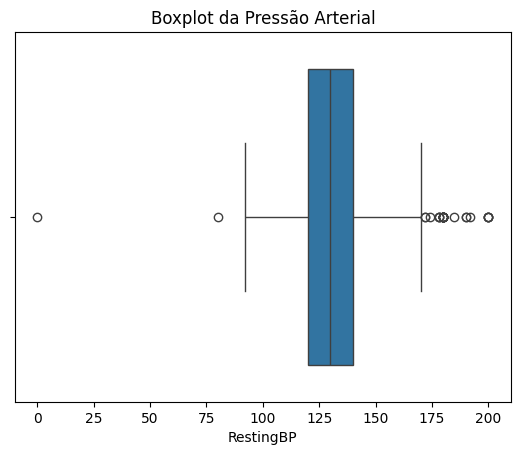

In [ ]:
# Visualizando através do Histograma a distribuição da Pressão Arterial
plt.figure(figsize=(10, 6))
sns.histplot(df['RestingBP'], kde=True, bins=15)
plt.title('Distribuição de Pressão Arterial (mm Hg) (Histograma)')
plt.xlabel('Pressão Arterial (mm Hg)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot para visualizar outliers
sns.boxplot(x=df['RestingBP'])
plt.title("Boxplot da Pressão Arterial")
plt.show()

Nessa análise, vemos o histograma sobre a pressão arterial e o número de pacientes correspondentes delas. onde a maioria concentrasse no valor de 125 mmHG.

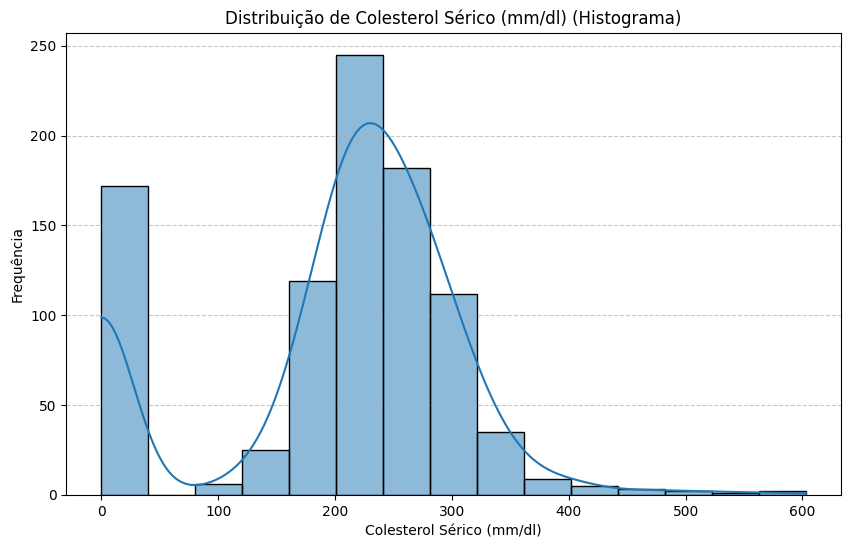

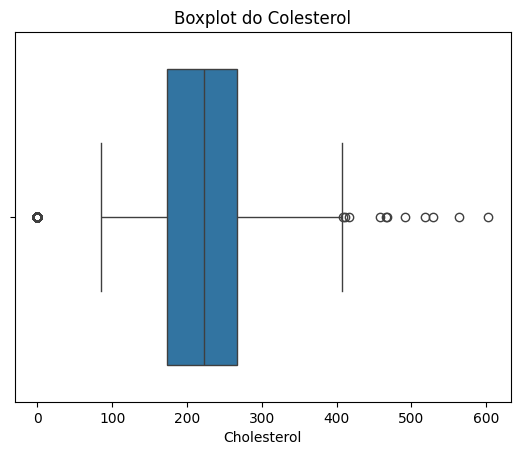

In [ ]:
# Visualizando através do Histograma a distribuição do Colesterol Sérico
plt.figure(figsize=(10, 6))
sns.histplot(df['Cholesterol'], kde=True, bins=15)
plt.title('Distribuição de Colesterol Sérico (mm/dl) (Histograma)')
plt.xlabel('Colesterol Sérico (mm/dl)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot
sns.boxplot(x=df['Cholesterol'])
plt.title("Boxplot do Colesterol")
plt.show()

Nessa análise, vemos o histograma analisando o valor do colesterol sérico em mm/dl. Podemos observar uma menor disparidade entre os dados.

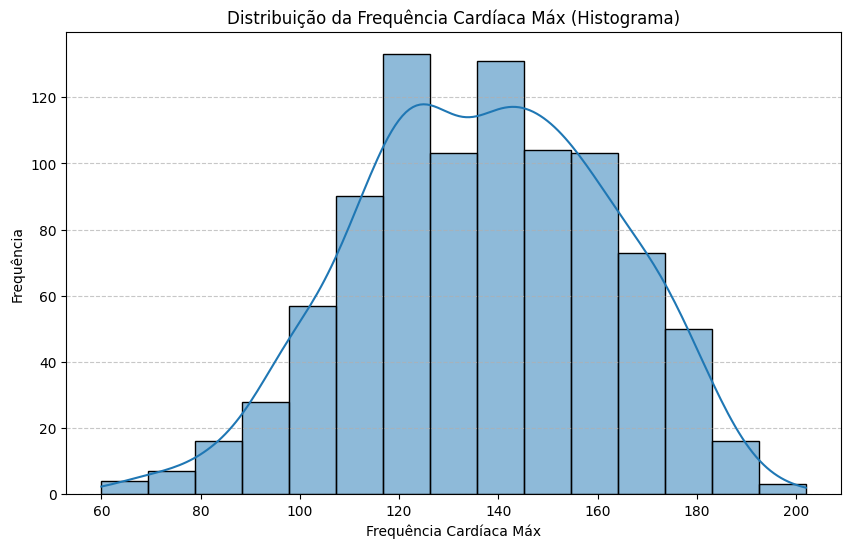

In [ ]:
# Visualizando através do Histograma a distribuição da Frequência Cardíaca Máx
plt.figure(figsize=(10, 6))
sns.histplot(df['MaxHR'], kde=True, bins=15)
plt.title('Distribuição da Frequência Cardíaca Máx (Histograma)')
plt.xlabel('Frequência Cardíaca Máx')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Neesa análise, vemos no histograma os picos da freqência cardíaca máxima, despertando a atenção de dois deles, um em 120 e outro em 140. pontos importantes que poderemos abordar sobre o paciente, podendo já ter algumas suspeitas de taquicardia em repouso ou até possiveis sinais de braquicardia.

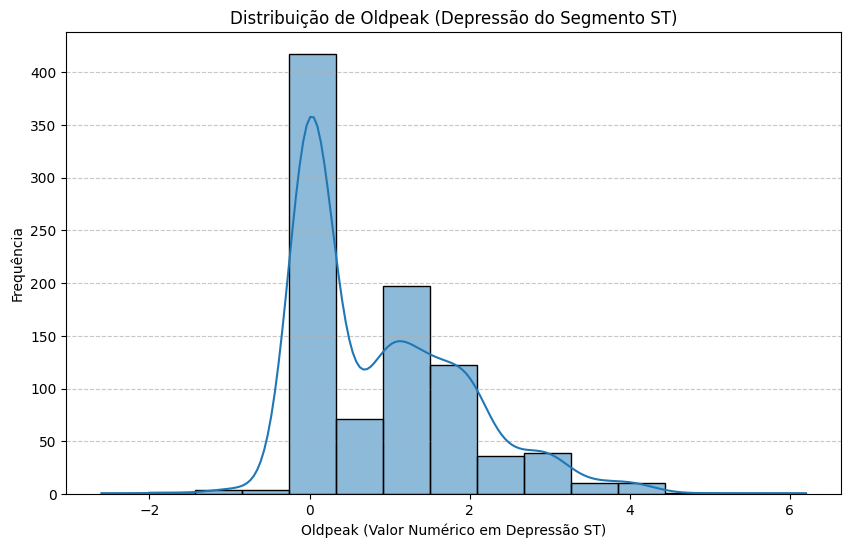

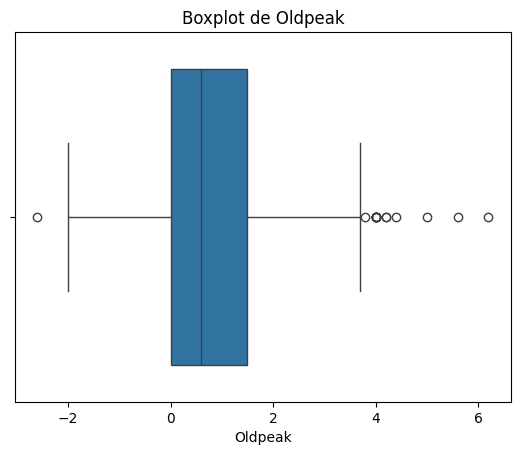

In [ ]:
# Visualizando através do Histograma a distribuição de Oldpeak
plt.figure(figsize=(10, 6))
sns.histplot(df['Oldpeak'], kde=True, bins=15)
plt.title('Distribuição de Oldpeak (Depressão do Segmento ST)')
plt.xlabel('Oldpeak (Valor Numérico em Depressão ST)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot
sns.boxplot(x=df['Oldpeak'])
plt.title("Boxplot de Oldpeak")
plt.show()

neese análise, analisamos o histograma do valor de oldpeak, , O Oldpeak representa o valor numérico da depressão do segmento ST, medida em milímetros (mm), durante um eletrocardiograma (ECG) de esforço, em relação ao nível de repouso/linha de base, que é um modelo de predição utilizado para diagnosticar doenças cardiovasculares.

### 4.2 Variáveis Categóricas

As variáveis categóricas são analisadas para identificar possíveis associações com a presença de doença cardíaca.

Diferenças significativas na distribuição das categorias entre pacientes com e sem doença podem indicar alto poder preditivo dessas variáveis.

Essa análise é especialmente importante para orientar decisões de codificação (ex: one-hot encoding) no pré-processamento.


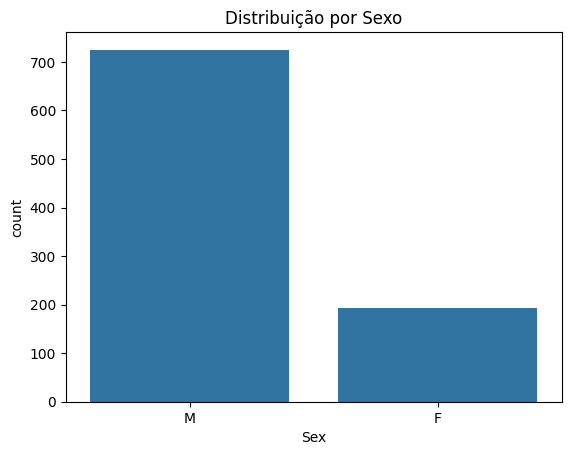

In [ ]:
# Quantidade de observações por Sexo
sns.countplot(x='Sex', data=df)
plt.title("Distribuição por Sexo")
plt.show()

Nesta análise vemos que grand emaioria dos pacientes contidos no dataset é do sexo masculino, cobrindo 78% dos dados, enquanto as mulheres são a minoria cobrindo 22%.

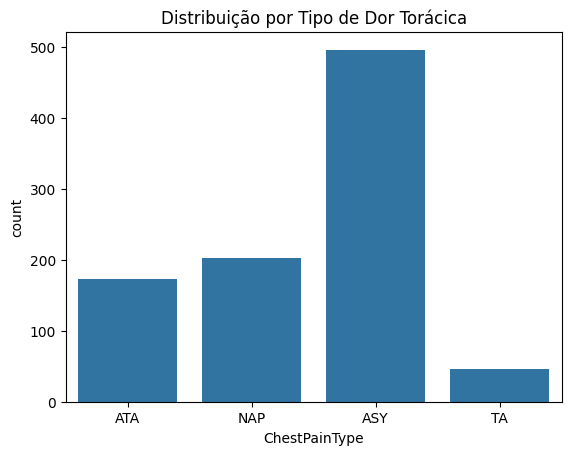

In [ ]:
# Quantidade de observações por Tipo de Dor Toraxica
sns.countplot(x='ChestPainType', data=df)
plt.title("Distribuição por Tipo de Dor Torácica")
plt.show()

neste histograma analisamos os tipos de dores torácicas, sendo no total 4 delas: TA (Typical Angina): sugere forte probabilidade de doença coronariana obstrutiva; como DAC é uma das principais causas de insuficiência cardíaca, pacientes com TA tendem a ter risco maior de desenvolver IC ao longo do tempo, ATA (Atypical Angina): indica probabilidade intermediária de DAC; ainda assim, aumenta a chance de o paciente ter isquemia e, portanto, de evoluir para IC no futuro, NAP (Non‑Anginal Pain): menos provável que represente DAC; em um modelo de IC, tenderia a reduzir a probabilidade de causa isquêmica (embora IC possa existir por outras causas, como hipertensão, valvulopatias, cardiomiopatias etc.), ASY (Asymptomatic): pode esconder isquemia silenciosa ou, simplesmente, indicar que a IC (se existir) tem outra etiologia não coronariana; em populações diabéticas ou idosas, parte relevante dos pacientes com DAC e IC é pouco sintomática.

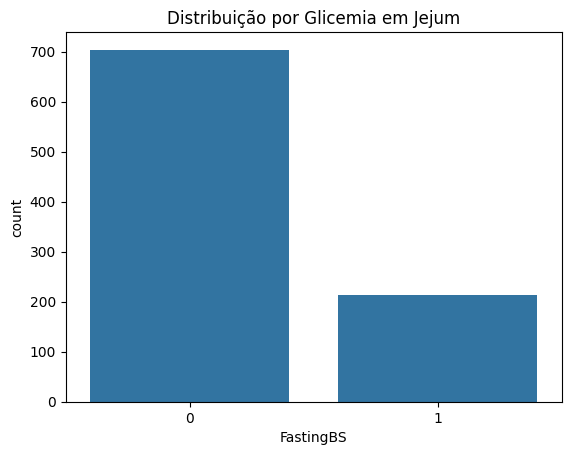

In [ ]:
# Quantidade de observações por Glicemia em Jejum (açúcar no sangue)
sns.countplot(x='FastingBS', data=df)
plt.title("Distribuição por Glicemia em Jejum")
plt.show()

Neste gráfico, estamos analisando o nível da glicemia em jejum dos pacintes contidos nos dados. Onde sua grande maioria (77%) está contida na classe 0 abaixao de 120 mg/dL (normoglicêmicos), e a minoria (23%) compõem a classe 1 (hiperglecêmico) que é um dos fatores de insuficiência cardíaca.   

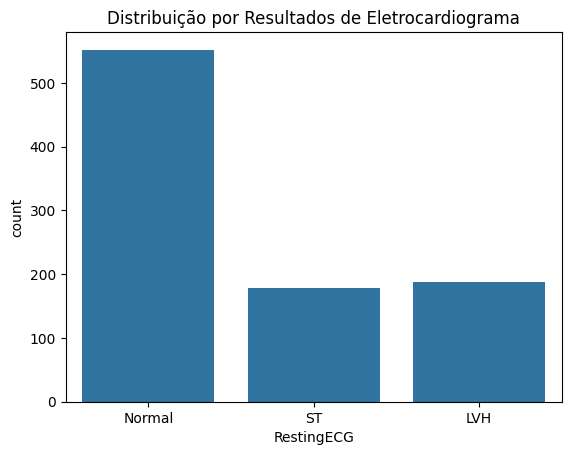

In [ ]:
# Quantidade de observações por Resultados de Eletrocardiograma
sns.countplot(x='RestingECG', data=df)
plt.title("Distribuição por Resultados de Eletrocardiograma")
plt.show()

neste gráfico analisamos os resultados do ECG (eletrocardiograma) em repouso, sendo distribuido em 3 classes: Normal(ecg normal sem nenhuma alteração), ST(apresentando anormalidade da onda ST-T inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV) e LVH (hipertrofia do ventriculo esquerdo), essas duas ultimas alterações tem ponto positivo para causar insuficiência cardíaca.

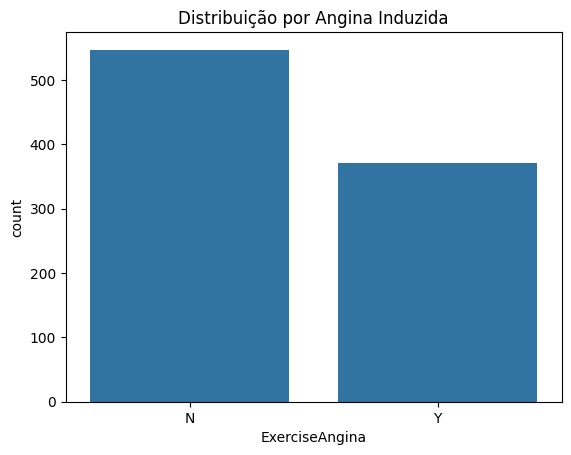

In [ ]:
# Quantidade de observações por Angina Induzida
sns.countplot(x='ExerciseAngina', data=df)
plt.title("Distribuição por Angina Induzida")
plt.show()

No gráfico acima analisamos a presença de angina induzida por exercício, um ponto de destaque para uma possível insuficiência cardíaca, onde cerca de 40% dos dados corresponde à classe Y (que seria "yes/ sim" para a presneça de angina por esforço).

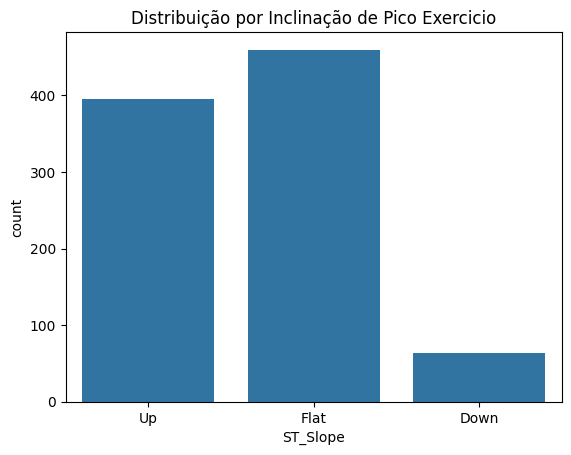

In [ ]:
# Quantidade de observações por Inclinação de Pico Exercicio
sns.countplot(x='ST_Slope', data=df)
plt.title("Distribuição por Inclinação de Pico Exercicio")
plt.show()

Neste gráfico analisamos o a inclininação mo segmento ST no pico do exercício, sendo dividadido em três classes: UP(ascendente), flat(plano) e down(descendente).

## 5. Análise Bivariada (Variáveis vs Target)

Nesta etapa, investigamos a relação entre as variáveis explicativas e a variável alvo (*HeartDisease*).

O objetivo é identificar padrões e associações relevantes, como:
- Diferenças de distribuição entre pacientes com e sem doença cardíaca
- Variáveis potencialmente mais discriminativas para o modelo

### 5.1 Numérica × Target

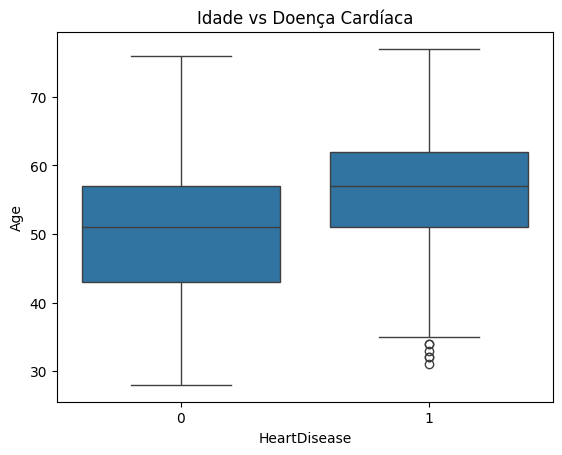

In [ ]:
# Visualizando a variável Age x HeartDisease
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title("Idade vs Doença Cardíaca")
plt.show()

Pacientes com doença cardíaca (1) exibem mediana de idade em torno de 55 anos, superior à do grupo sem doença (0), próxima de 50 anos. Os boxplots mostram dispersão maior no grupo saudável e alguns outliers idosos (acima de 65) em ambos, indicando que idade avançada é um fator de risco moderado. A diferença nas medianas sugere associação positiva com a doença.

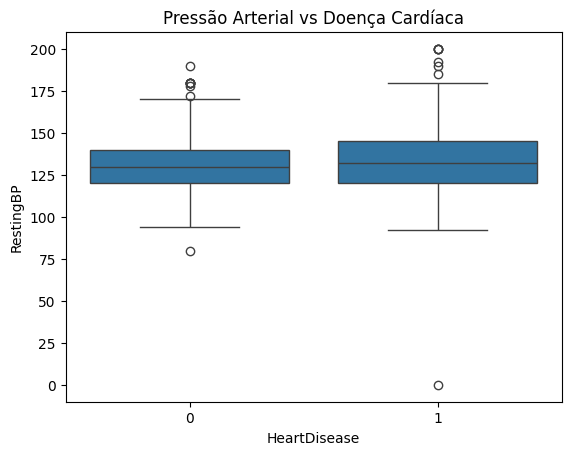

In [ ]:
# Visualizando a variável RestingBP x HeartDisease
sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.title("Pressão Arterial vs Doença Cardíaca")
plt.show()

A pressão arterial de repouso apresenta medianas próximas de 130 mmHg para os dois grupos, com sobreposição total nos boxplots. Outliers extremos aparecem em ambos os lados (acima de 175 e abaixo de 100 mmHg), indicando variabilidade individual sem associação evidente com a doença. A distribuição é simétrica e não discriminatória.

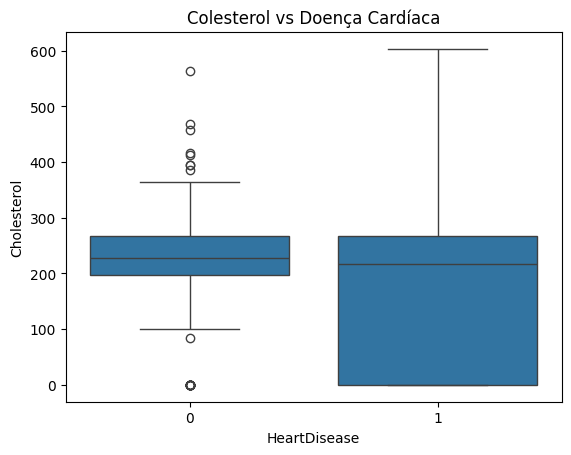

In [ ]:
# Visualizando a variável Cholesterol x HeartDisease
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Colesterol vs Doença Cardíaca")
plt.show()

Os níveis de colesterol são semelhantes entre pacientes sem (0) e com (1) doença cardíaca, com medianas em torno de 300 mg/dL para ambos os grupos. Há uma ampla dispersão e vários outliers altos acima de 500 mg/dL em ambos, mas sem diferença clara entre os grupos. Isso sugere que o colesterol isolado não distingue fortemente a doença nessa amostra.

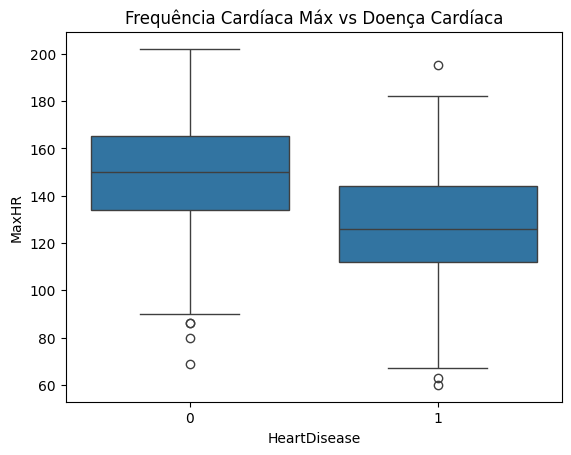

In [ ]:
# Visualizando a variável MaxHR x HeartDisease
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title("Frequência Cardíaca Máx vs Doença Cardíaca")
plt.show()

Pacientes sem doença (0) têm mediana de frequência cardíaca máxima em cerca de 165 bpm, enquanto com doença (1) está ligeiramente menor, próximo a 160 bpm. Os boxplots se sobrepõem amplamente, com outliers baixos abaixo de 100 bpm mais notáveis no grupo sem doença. Há uma tendência sutil de valores menores no grupo com doença, mas não conclusiva.
​

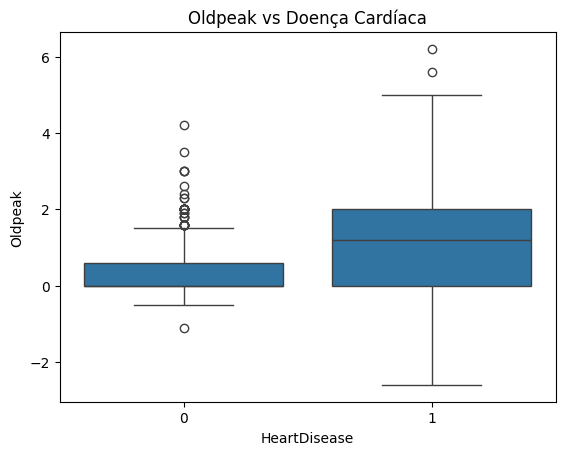

In [ ]:
# Visualizando a variável Oldpeak x HeartDisease
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title("Oldpeak vs Doença Cardíaca")
plt.show()

O oldpeak (depressão do ST induzida por exercício) mostra mediana próxima de zero no grupo sem doença (0) e ligeiramente maior no grupo com (1), em torno de 1 unidade. Há maior dispersão e outliers altos (até 6) no grupo com doença, sugerindo que valores elevados estão mais associados à presença da condição. A sobreposição existe, mas a tendência é para maiores valores na doença.

### 5.2 Categórica × Target

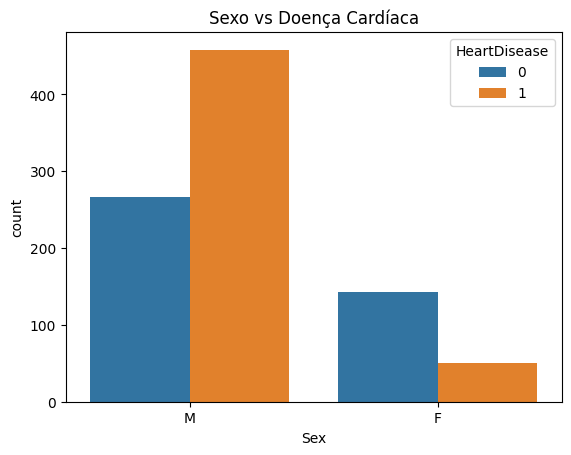

In [ ]:
# Visualizando a variável Sex x HeartDisease
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title("Sexo vs Doença Cardíaca")
plt.show()

Entre homens (M), o número de casos com doença (1) é bem maior que o número sem doença (0), mostrando maior concentração de doença nesse grupo.

Entre mulheres (F), ocorre o oposto: há mais mulheres sem doença (0) do que com doença (1), sugerindo que, na amostra, homens são mais afetados por doença cardíaca do que mulheres.

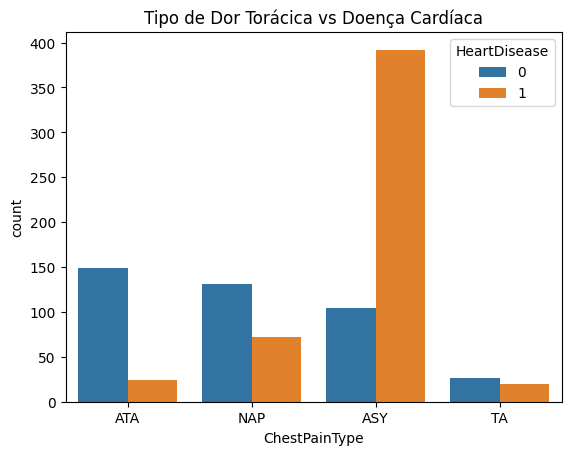

In [ ]:
# Visualizando a variável ChestPainType x HeartDisease
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title("Tipo de Dor Torácica vs Doença Cardíaca")
plt.show()

Dor do tipo assintomática (ASY) concentra a maior parte dos casos com doença (1), superando bastante os sem doença (0), sugerindo que muitos pacientes com doença não relatam dor típica.

Nos tipos ATA (angina típica), NAP (angina atípica) e TA (não anginosa), as barras de sem doença (0) tendem a ser iguais ou maiores que as de com doença (1), indicando que esses tipos de dor não são tão específicos para doença cardíaca quanto o padrão assintomático observado.

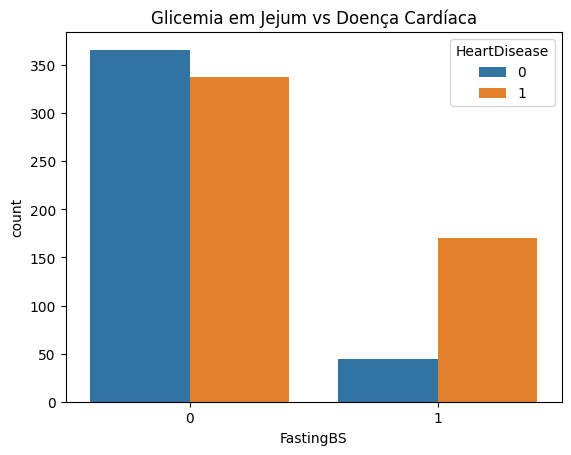

In [ ]:
# Visualizando a variável FastingBS x HeartDisease
sns.countplot(x='FastingBS', hue='HeartDisease', data=df)
plt.title("Glicemia em Jejum vs Doença Cardíaca")
plt.show()

Para glicemia em jejum normal (0), a contagem de pessoas sem doença (0) é um pouco maior que a de pessoas com doença (1), mostrando que a maioria com glicemia normal não tem doença.

Para glicemia elevada (1), predominam os pacientes com doença (1), indicando que glicemia alta em jejum aparece mais frequentemente em indivíduos com doença cardíaca, sugerindo relação com risco aumentado.


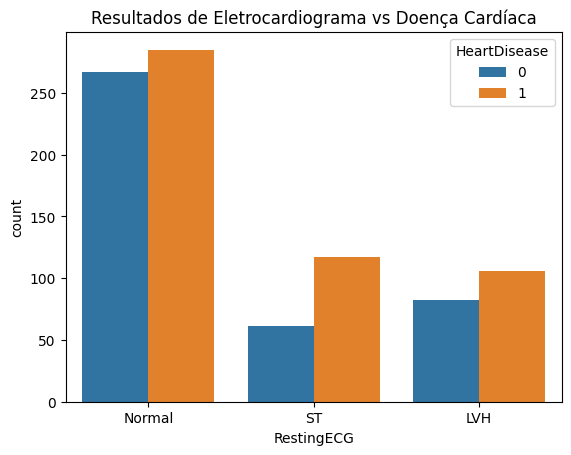

In [ ]:
# Visualizando a variável RestingECG x HeartDisease
sns.countplot(x='RestingECG', hue='HeartDisease', data=df)
plt.title("Resultados de Eletrocardiograma vs Doença Cardíaca")
plt.show()

Em todos os tipos de ECG (Normal, ST, LVH) há pacientes com e sem doença, mas os grupos ST e LVH têm barras maiores para quem tem doença (1) do que para quem não tem (0).

Isso sugere que alterações no ECG em repouso (ST alterado ou hipertrofia ventricular esquerda – LVH) aparecem com mais frequência em pacientes com doença cardíaca do que em quem está saudável.

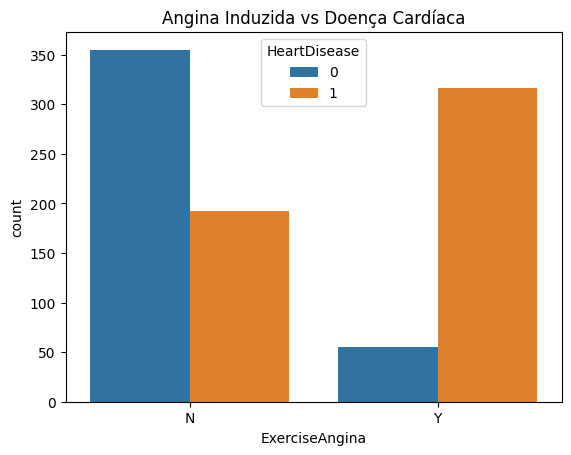

In [ ]:
# Visualizando a variável ExerciseAngina x HeartDisease
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df)
plt.title("Angina Induzida vs Doença Cardíaca")
plt.show()

Quando não há angina induzida (N), a maioria dos casos é de pessoas sem doença (0), embora ainda existam vários com doença (1).

Quando há angina induzida (Y), a grande maioria dos registros corresponde a pacientes com doença (1), indicando forte associação entre sentir dor no peito ao esforço e presença de doença cardíaca.

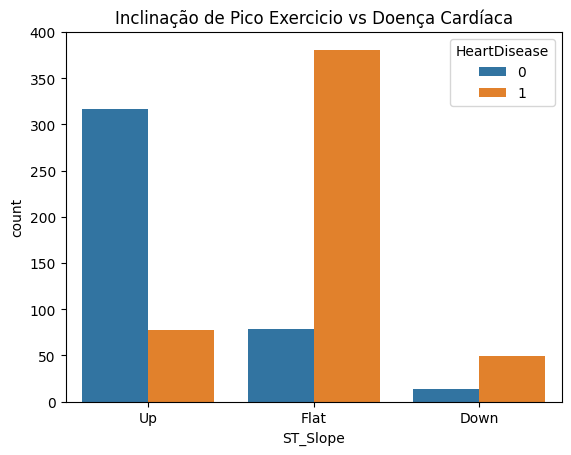

In [ ]:
# Visualizando a variável ST_Slope x HeartDisease
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)
plt.title("Inclinação de Pico Exercicio vs Doença Cardíaca")
plt.show()

Para inclinação “Up” (ascendente), predominam os casos sem doença (0), sugerindo um padrão mais comum em indivíduos saudáveis.

Para “Flat” (plana) e “Down” (descendente), há muito mais pacientes com doença (1) do que sem (0), indicando que ST plano ou descendente durante o esforço está fortemente associado à presença de doença cardíaca.
​

## 6. Análise de Correlação

A matriz de correlação permite avaliar a relação linear entre as variáveis numéricas.

Correlação elevada entre variáveis pode indicar:
- Redundância de informação
- Possível multicolinearidade, que pode afetar alguns modelos

Essa análise auxilia na compreensão das relações internas do dataset e no cuidado com a seleção de features.

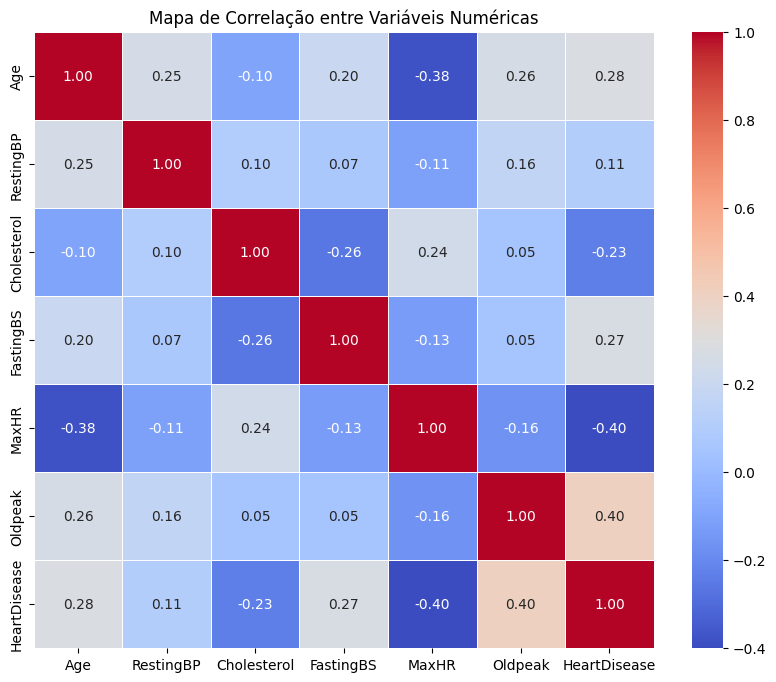

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(
    df_numeric.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()

Podemos identificar preditores principais para doença cardíaca, como idade e oldpeak (positivos fortes), e MaxHR (negativo forte), úteis para priorizar features em modelos de machine learning. Correlações baixas (ex.: colesterol próximo de zero com doença) indicam que essas variáveis isoladas não preveem bem a condição. Evidências de multicolinearidade, como entre MaxHR e oldpeak, sugerem cuidado em análises regressivas para evitar redundância.

## 7. Investigações Exploratórias

Nesta seção, realizamos investigações exploratórias adicionais, combinando múltiplas variáveis para responder perguntas relevantes que surgirem.

### 7.1 Idade × Sexo × Doença Cardíaca

**Por que faz sentido?**

- Risco cardiovascular aumenta com a idade
- Diferenças fisiológicas entre sexos
- Padrões diferentes de manifestação da doença

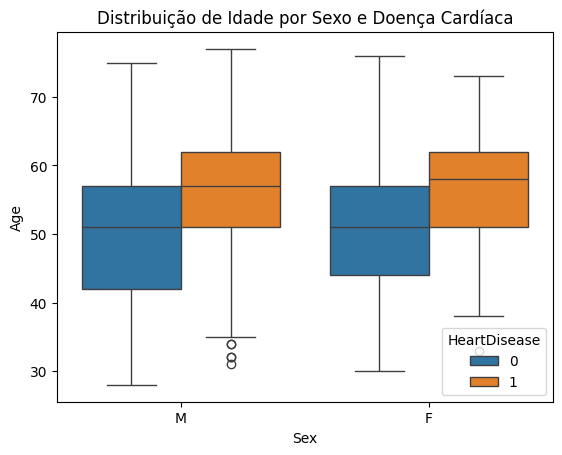

In [ ]:
sns.boxplot(
    x='Sex',
    y='Age',
    hue='HeartDisease',
    data=df
)
plt.title("Distribuição de Idade por Sexo e Doença Cardíaca")
plt.show()

As medianas de idade são próximas entre homens e mulheres sem doença (cerca de 50 anos), com boxplots azuis sobrepostos. Homens com doença mostram mediana em torno de 55 anos (caixa laranja ligeiramente mais alta), e mulheres com doença também em cerca de 55 anos, com dispersão similar. Isso indica que a doença eleva a idade média em ambos os sexos igualmente, sem diferença clara por gênero na distribuição etária.

### 7.2 Tipo de Dor Torácica × Angina por Exercício × Doença Cardíaca

**Por que faz sentido?**

- Dor torácica é sintoma central
- Angina por exercício indica comprometimento funcional
- A combinação é muito usada clinicamente


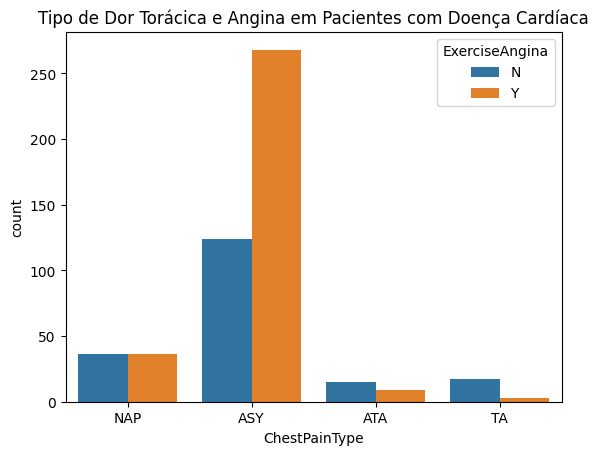

In [ ]:
sns.countplot(
    x='ChestPainType',
    hue='ExerciseAngina',
    data=df[df['HeartDisease'] == 1]
)
plt.title("Tipo de Dor Torácica e Angina em Pacientes com Doença Cardíaca")
plt.show()


Entre pacientes com doença cardíaca, o tipo ASY (assintomática) domina com mais de 200 casos sem angina induzida (azul) e pico alto com angina (laranja), sugerindo que muitos sintomáticos têm ASY. Para NAP e ATA, há equilíbrio razoável entre com e sem angina (cerca de 100 cada), enquanto TA tem poucos casos totais. Isso revela que angina induzida por exercício ocorre mais em ASY do que em outros tipos de dor torácica nessa população com doença.

### 7.3 Frequência Cardíaca Máxima × Idade × Doença Cardíaca

**Por que faz sentido?**

- Capacidade funcional diminui com idade
- MaxHR é marcador cardiovascular importante
- Relação não é óbvia no bivariado simples

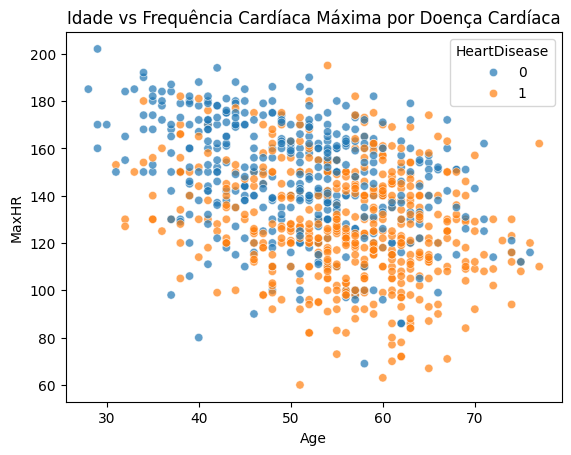

In [ ]:
sns.scatterplot(
    x='Age',
    y='MaxHR',
    hue='HeartDisease',
    data=df,
    alpha=0.7
)
plt.title("Idade vs Frequência Cardíaca Máxima por Doença Cardíaca")
plt.show()

Pontos azuis (sem doença) formam uma nuvem descendente clara com a idade: MaxHR cai de ~180 bpm em jovens para ~120 bpm em idosos. Pontos laranja (com doença) mostram tendência similar, mas deslocada para baixo (MaxHR mais baixa em todas as idades, especialmente acima de 50 anos). A relação inversa idade-MaxHR é confirmada para ambos os grupos, mas pacientes com doença atingem frequências menores, reforçando seu impacto como fator de risco.

## 8. Demonstração do Split Treino/Teste

Nesta seção, demonstramos a separação dos dados em conjuntos de treino e teste.

A divisão é realizada de forma estratificada para preservar a proporção da variável alvo, garantindo uma avaliação mais justa dos modelos.

O pré-processamento completo e reutilizável será implementado posteriormente no arquivo `src/preprocessing.py`.

Primeiro, vamos definir nossas variáveis preditoras (X) e a variável alvo (y).

In [ ]:
from sklearn.model_selection import train_test_split

# Definir variáveis preditoras (X) e variável alvo (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print(f'Dimensões de X: {X.shape}')
print(f'Dimensões de y: {y.shape}')

Dimensões de X: (918, 11)
Dimensões de y: (918,)


Agora, vamos dividir os dados em conjuntos de treino e teste, usando uma proporção de 80% para treino e 20% para teste. Utilizaremos `stratify=y` para garantir que a proporção da variável alvo seja mantida em ambos os conjuntos, e `random_state` para reprodutibilidade.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de X_test: {X_test.shape}')
print(f'Dimensões de y_train: {y_train.shape}')
print(f'Dimensões de y_test: {y_test.shape}')

print('\nProporção da variável alvo em y original:')
print(y.value_counts(normalize=True))

print('\nProporção da variável alvo em y_train:')
print(y_train.value_counts(normalize=True))

print('\nProporção da variável alvo em y_test:')
print(y_test.value_counts(normalize=True))

Dimensões de X_train: (734, 11)
Dimensões de X_test: (184, 11)
Dimensões de y_train: (734,)
Dimensões de y_test: (184,)

Proporção da variável alvo em y original:
HeartDisease
1   0.55
0   0.45
Name: proportion, dtype: float64

Proporção da variável alvo em y_train:
HeartDisease
1   0.55
0   0.45
Name: proportion, dtype: float64

Proporção da variável alvo em y_test:
HeartDisease
1   0.55
0   0.45
Name: proportion, dtype: float64


## 9. Conclusões e Insights do EDA

A Análise Exploratória de Dados (EDA) permitiu compreender de forma aprofundada a estrutura do dataset e identificar padrões relevantes relacionados à presença de doença cardíaca.

### Estrutura dos Dados
O dataset é composto por **918 registros e 12 variáveis**, não apresentando valores ausentes, o que simplifica significativamente a etapa de pré-processamento. As variáveis incluem dados **numéricos** (como Age, RestingBP, Cholesterol, MaxHR e Oldpeak) e **categóricos** (Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina e ST_Slope), exigindo tratamentos distintos nas próximas etapas do pipeline.

### Variável Alvo (HeartDisease)
Observou-se um **desbalanceamento moderado** da variável alvo, com maior proporção de pacientes diagnosticados com doença cardíaca (classe 1). Esse cenário reforça a necessidade de utilizar métricas de avaliação mais adequadas ao contexto de saúde, como **Recall** e **F1-score**, em vez de depender exclusivamente da acurácia.

### Estatísticas Descritivas e Outliers
Algumas variáveis numéricas, como **RestingBP** e **Cholesterol**, apresentaram valores mínimos iguais a zero, possivelmente representando outliers ou inconsistências de registro, o que demandará tratamento específico no pré-processamento. A variável **Oldpeak** também apresentou valores extremos, indicando assimetria e presença de outliers relevantes.

### Relação entre Variáveis Numéricas e Doença Cardíaca
- **Age**: Pacientes com doença cardíaca tendem a ser mais velhos, indicando a idade como um fator de risco moderado.
- **MaxHR**: Observou-se uma tendência de menores frequências cardíacas máximas em pacientes com doença, especialmente em faixas etárias mais elevadas.
- **Oldpeak**: Valores mais altos estão fortemente associados à presença de doença cardíaca, destacando seu alto poder discriminativo.
- **RestingBP e Cholesterol**: Não apresentaram diferenças significativas entre os grupos em análises bivariadas simples, sugerindo que seu impacto pode ocorrer de forma indireta ou combinada com outras variáveis.

### Relação entre Variáveis Categóricas e Doença Cardíaca
- **Sex**: Homens apresentaram incidência significativamente maior de doença cardíaca na amostra.
- **ChestPainType**: O tipo assintomático (ASY) é predominante entre pacientes com doença cardíaca.
- **FastingBS**: Valores elevados de glicemia em jejum estão associados a maior probabilidade de doença.
- **RestingECG**: Alterações como ST e LVH são mais frequentes em pacientes doentes.
- **ExerciseAngina**: A presença de angina induzida por exercício mostrou-se um forte indicador de doença cardíaca.
- **ST_Slope**: Inclinações “Flat” e “Down” estão fortemente associadas à doença, enquanto “Up” é mais comum em indivíduos saudáveis.

### Correlação entre Variáveis Numéricas
As análises de correlação indicaram relações relevantes entre **Age**, **Oldpeak** e **HeartDisease**, bem como uma correlação negativa entre **MaxHR** e a variável alvo. A baixa correlação entre **Cholesterol** e **HeartDisease** reforça os resultados observados nas análises bivariadas.

### Investigações Exploratórias Adicionais
Análises combinadas evidenciaram que:
- A doença cardíaca eleva a idade média de pacientes de ambos os sexos de forma semelhante.
- Pacientes com doença cardíaca apresentam maior prevalência de dor torácica do tipo assintomática, frequentemente associada à angina induzida por exercício.
- A relação inversa entre idade e frequência cardíaca máxima é mais acentuada em pacientes com doença, reforçando o impacto clínico da condição.

### Conclusão
Os insights obtidos nesta EDA fornecem uma base sólida para as próximas etapas do projeto, orientando decisões de **pré-processamento**, **seleção de features** e **interpretação dos modelos de Machine Learning**, sempre considerando o contexto crítico da área da saúde.
